## 回归

In [1]:
import numpy as np
import pandas as pd

In [2]:
dt = pd.read_csv('/Users/apple/Documents/Jupytor_Notebook/ai_programming/5.7/实验8降维回归和分类/data_akbilgic.csv')

In [3]:
dt1 = dt.iloc[:,1:]

In [4]:
dt1.index = dt.iloc[:,0]

In [5]:
dt1.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


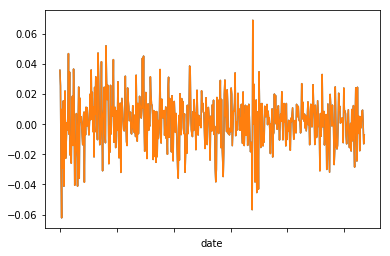

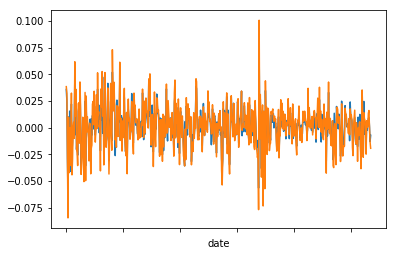

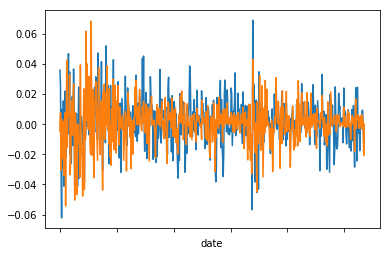

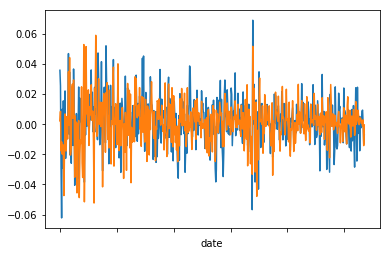

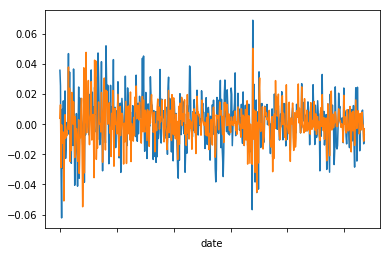

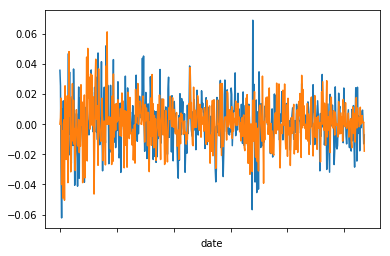

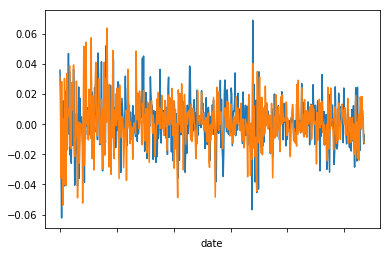

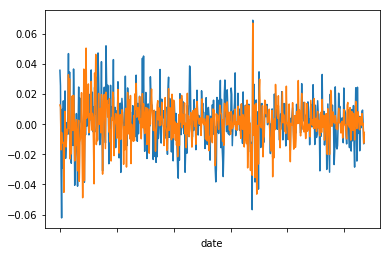

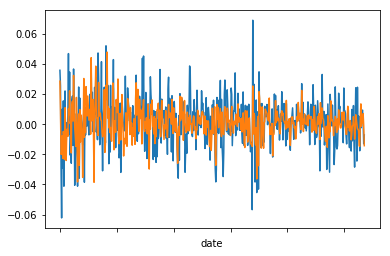

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in dt1.columns :
    dt1.iloc[:,0].plot()
    dt1.loc[:,i].plot()
    plt.show()

In [ ]:
# 可见ISE.1与ISE契合最好，可以进行回归

In [7]:
from sklearn.model_selection import train_test_split 
x = np.array(dt1.iloc[:,1:])
y = np.array(dt1.iloc[:,0])
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.1, random_state = 1)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(x_train , y_train)

In [9]:
reg.coef_

array([ 0.78944223, -0.01651595,  0.09210238,  0.09347127, -0.07960798,
        0.07976308, -0.13575937, -0.24579882])

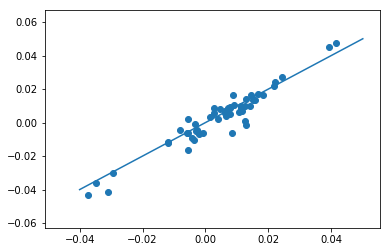

In [10]:
s = np.linspace(-0.04, 0.05, 50)
plt.scatter(reg.predict(x_test) , y_test)
plt.plot(s , s)
plt.show()

In [11]:
reg.score(x_train , y_train)

0.9083209743256578

In [12]:
reg.score(x_test , y_test)

0.9120677043109813

### MSE

In [13]:
mse1 = sum((np.dot(x_train,reg.coef_)-y_train)**2)/x_train.shape[0]

In [14]:
mse1

2.445732437101648e-05

In [15]:
mse2 = sum((np.dot(x_test,reg.coef_)-y_test)**2)/x_test.shape[0]

In [16]:
mse2

2.3506131511276788e-05

### 降维

In [17]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2,init='pca')
dt_1 = tsne.fit_transform(dt1.iloc[:,1:])

In [18]:
from sklearn.model_selection import train_test_split 
dt_1 = pd.DataFrame(dt_1)
x1 = np.array(dt_1)
y1 = np.array(dt1.iloc[:,0])
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1 , y1, test_size = 0.1, random_state = 1)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg1 = lr.fit(x_train1 , y_train1)

In [20]:
reg1.coef_

array([ 0.0005875 , -0.00036177], dtype=float32)

In [21]:
reg1.score(x_train1 , y_train1)

0.583365288154768

In [22]:
reg1.score(x_test1 , y_test1)

0.5354036897525182

In [23]:
mse_1 = sum((np.dot(x_train1,reg1.coef_)-y_train1)**2)/x_train1.shape[0]

In [24]:
mse_1

0.00011293280605534169

In [25]:
mse_2 = sum((np.dot(x_test1,reg1.coef_)-y_test1)**2)/x_test1.shape[0]

In [55]:
mse_2

0.00011830690528049822

In [ ]:
# 可见降维后精确度有较大损失